🍔🍔🍔 The Big Mac Index is the price of the burger in various countries that are converted to one currency (such as the US dollar) and used to measure purchasing power parity.

In [1]:
library ('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library('data.table')


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [3]:
install.packages("tidytuesdayR")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
bigmac_index = read_csv('https://github.com/TheEconomist/big-mac-data/releases/download/2022-07/big-mac-adjusted-index.csv',
                  col_types =cols())

In [5]:
bigmac_index |> head()

date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-04-01,ARG,ARS,Argentina,2.50,1.0000000,2.500000,7803.329,1.922652,0.39117,NA,-0.06626,0.10096,0.97153
2000-04-01,AUS,AUD,Australia,2.59,1.6800000,1.541667,29144.877,2.301550,-0.28335,NA,-0.51898,-0.43285,0.01563
2000-04-01,BRA,BRL,Brazil,2.95,1.7900000,1.648045,4822.739,1.869734,-0.05696,NA,-0.36704,-0.25369,0.33645
2000-04-01,GBR,GBP,Britain,1.90,0.6329114,3.002000,20932.925,2.155755,0.48988,NA,0.00000,0.17908,1.11143
2000-04-01,CAN,CAD,Canada,2.85,1.4700000,1.938776,26087.329,2.247266,-0.07698,NA,-0.38047,-0.26953,0.30809
2000-04-01,CHL,CLP,Chile,1260.00,514.0000000,2.451362,4640.837,1.866505,0.40514,NA,-0.05688,0.11201,0.99133


🔅🔅🔅Since this is a big dataset, I have selected filtered the dataset with the Local currency units per dollar smaller than 10.

In [6]:
bigmac_data = bigmac_index |> 
    select(`name`, date, iso_a3, currency_code, local_price, dollar_ex, dollar_price, GDP_bigmac) |>
    filter(dollar_ex <= 10)

bigmac_data

name,date,iso_a3,currency_code,local_price,dollar_ex,dollar_price,GDP_bigmac
<chr>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Argentina,2000-04-01,ARG,ARS,2.50,1.0000000,2.500000,7803.329
Australia,2000-04-01,AUS,AUD,2.59,1.6800000,1.541667,29144.877
Brazil,2000-04-01,BRA,BRL,2.95,1.7900000,1.648045,4822.739
Britain,2000-04-01,GBR,GBP,1.90,0.6329114,3.002000,20932.925
Canada,2000-04-01,CAN,CAD,2.85,1.4700000,1.938776,26087.329
China,2000-04-01,CHN,CNY,9.90,8.2800000,1.195652,1620.622
Denmark,2000-04-01,DNK,DKK,24.75,8.0400000,3.078358,21146.569
Hong Kong,2000-04-01,HKG,HKD,10.20,7.7900000,1.309371,42546.075
Israel,2000-04-01,ISR,ILS,14.50,4.0500000,3.580247,12248.543


In [7]:
library('scales')


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




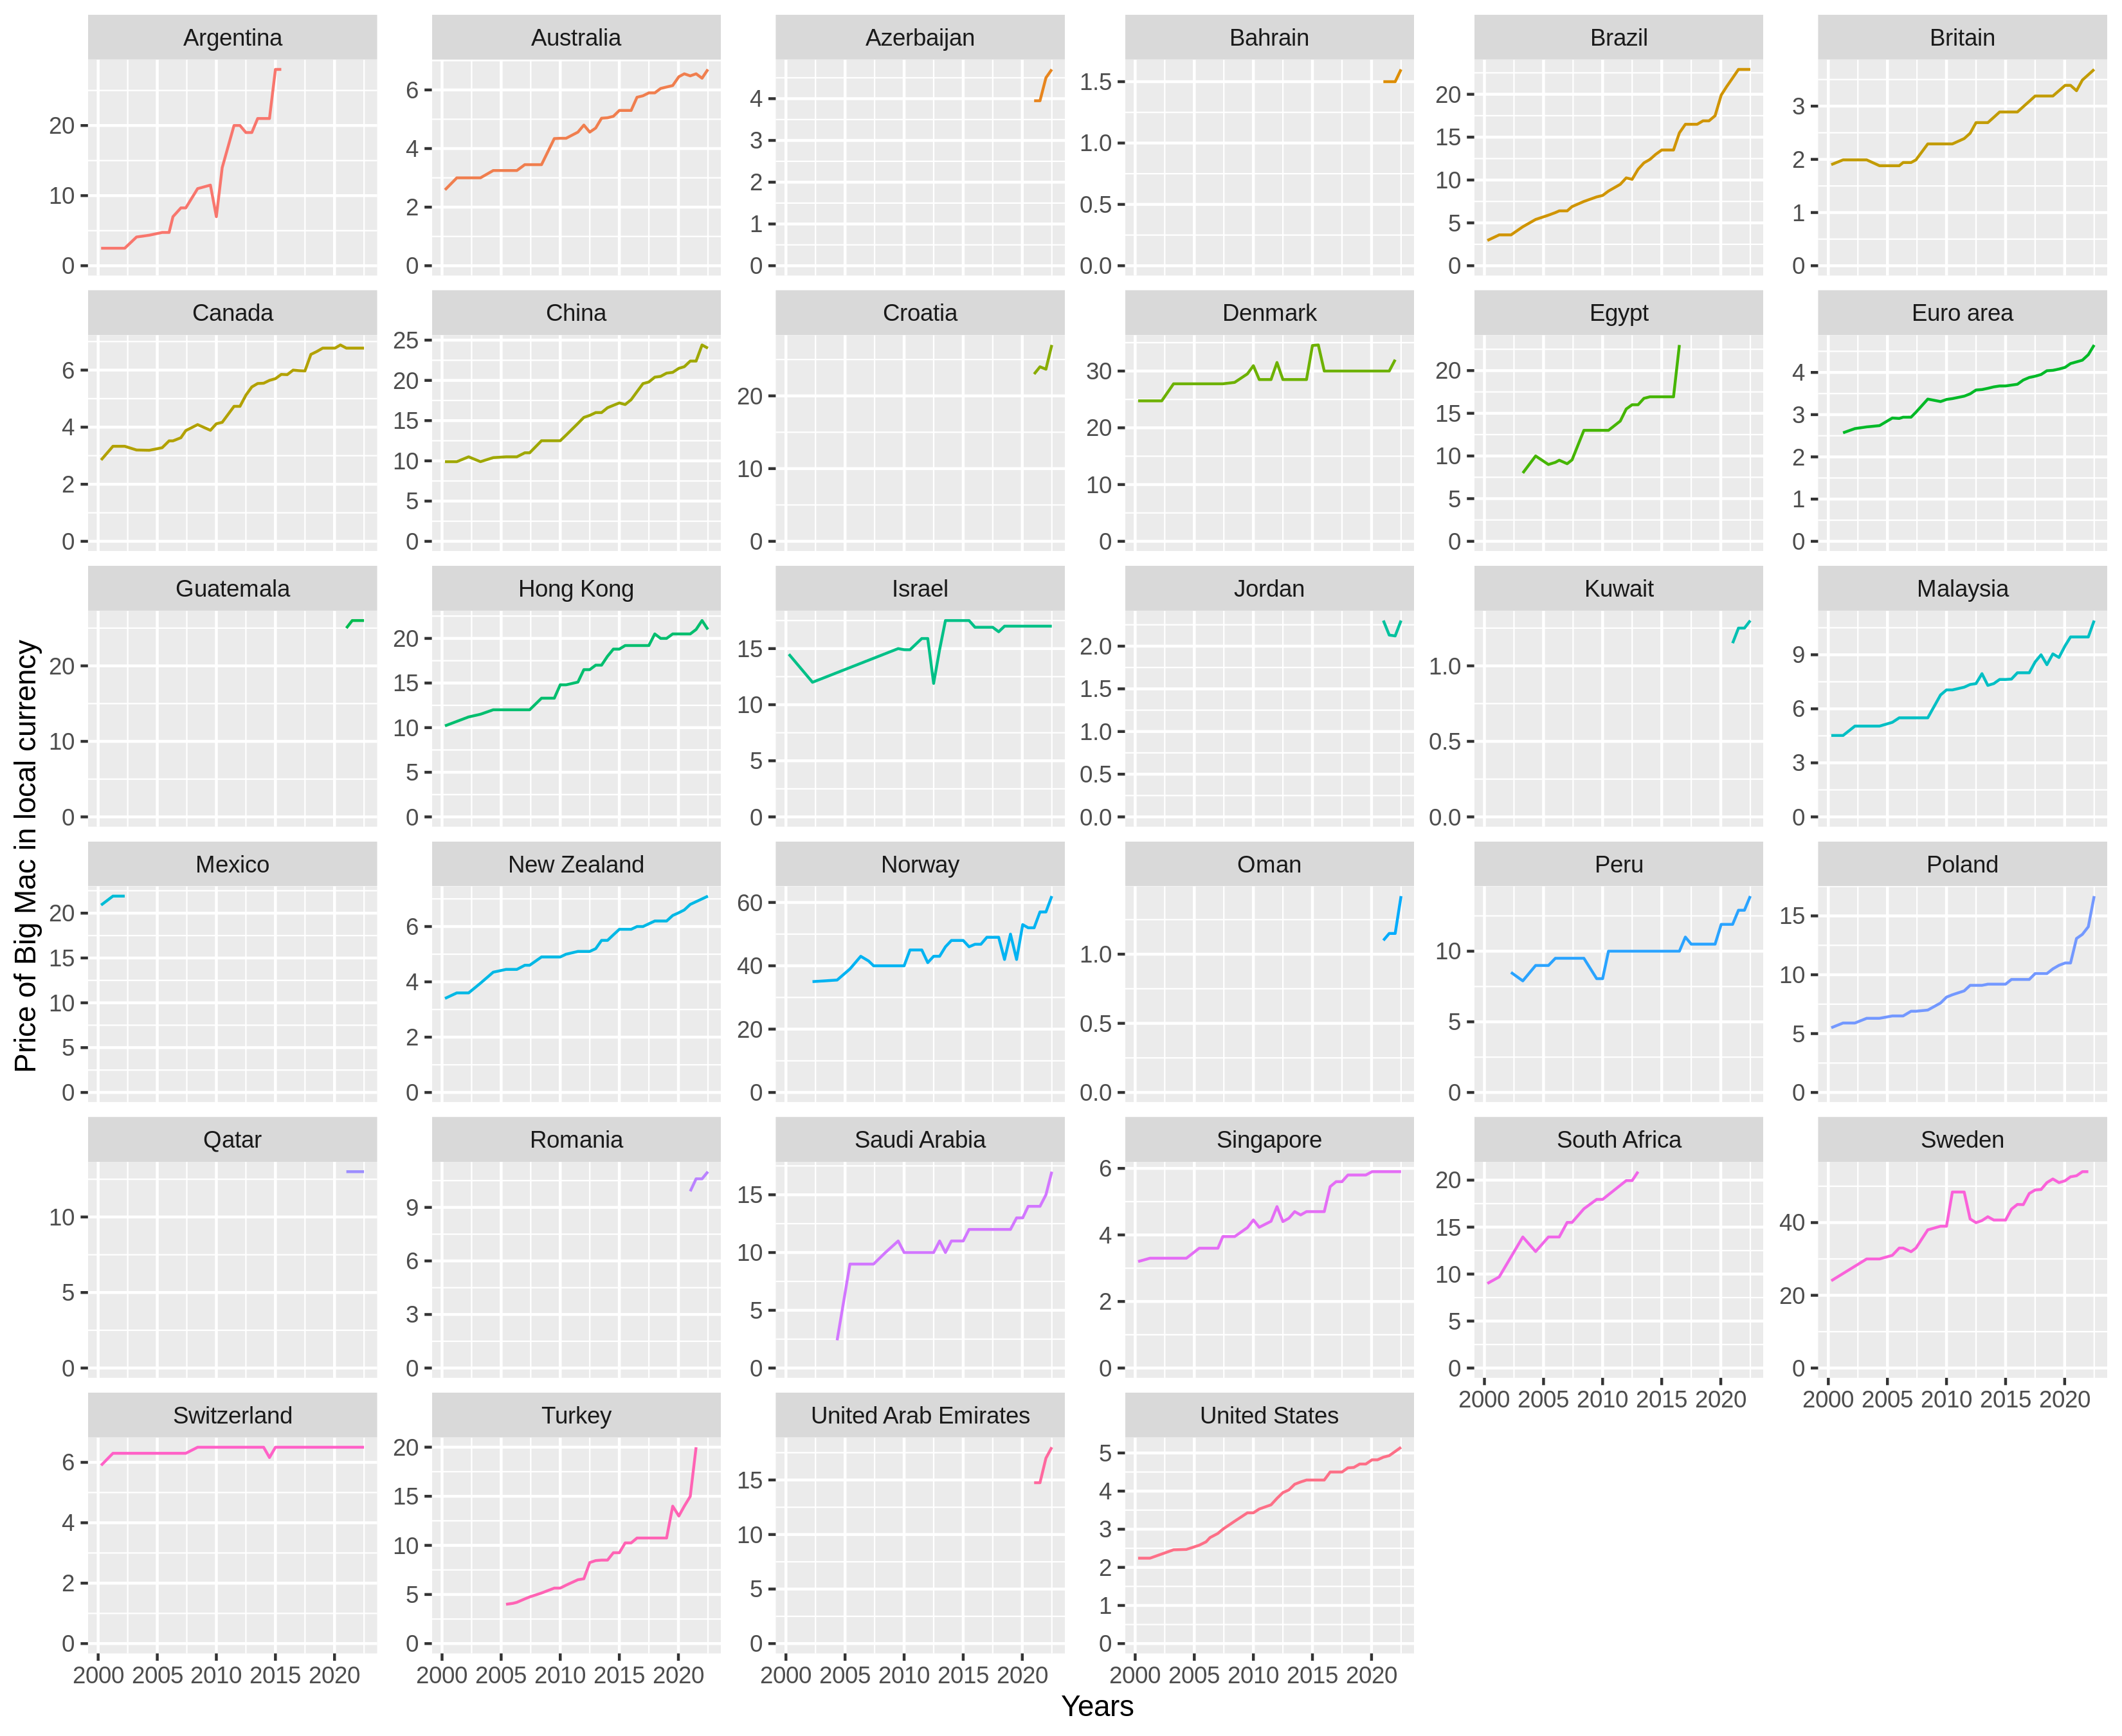

In [8]:
options(repr.plot.width=11, repr.plot.height=9)

p = ggplot(bigmac_data, aes(x=date, y=local_price, color = name)) +
        geom_line() +
        expand_limits(y=0) +
        facet_wrap(~name, scales = "free_y")+
        theme(legend.position = "none") +
        labs(x = "Years", y = "Price of Big Mac in local currency")
        
p

🌟 Baesd on the new table (bigmac_data) generated, only a few countries' big mac index were calculated. Please see more details in the graph above. Through the graph above we can see that the inflation in terms of big mac index over 20 years in each country represented.

🌟 With the table (bigmac_inf) generated below, we can see that the Argentina has the largest inflation over the years compared with all other countries that selected.

In [11]:
bigmac_inf = bigmac_data |>
    group_by(name) |>
    summarize(bigmac_inf = last(local_price) / first(local_price)) |>
    arrange(desc(bigmac_inf)) |>
    mutate(name = fct_reorder(name, bigmac_inf)) 

bigmac_inf

name,bigmac_inf
<fct>,<dbl>
Argentina,11.200000
Brazil,7.762712
Saudi Arabia,7.083333
Turkey,4.997500
Poland,3.032727
Egypt,2.875000
Australia,2.586873
China,2.424242
Malaysia,2.411504


🌟 Then I created a Big-Mac-adjusted per-capita GDP graph with using the price of a Big Mac to make the adjustment to see the relationship between GDP and big mac price.

`geom_smooth()` using formula = 'y ~ x'


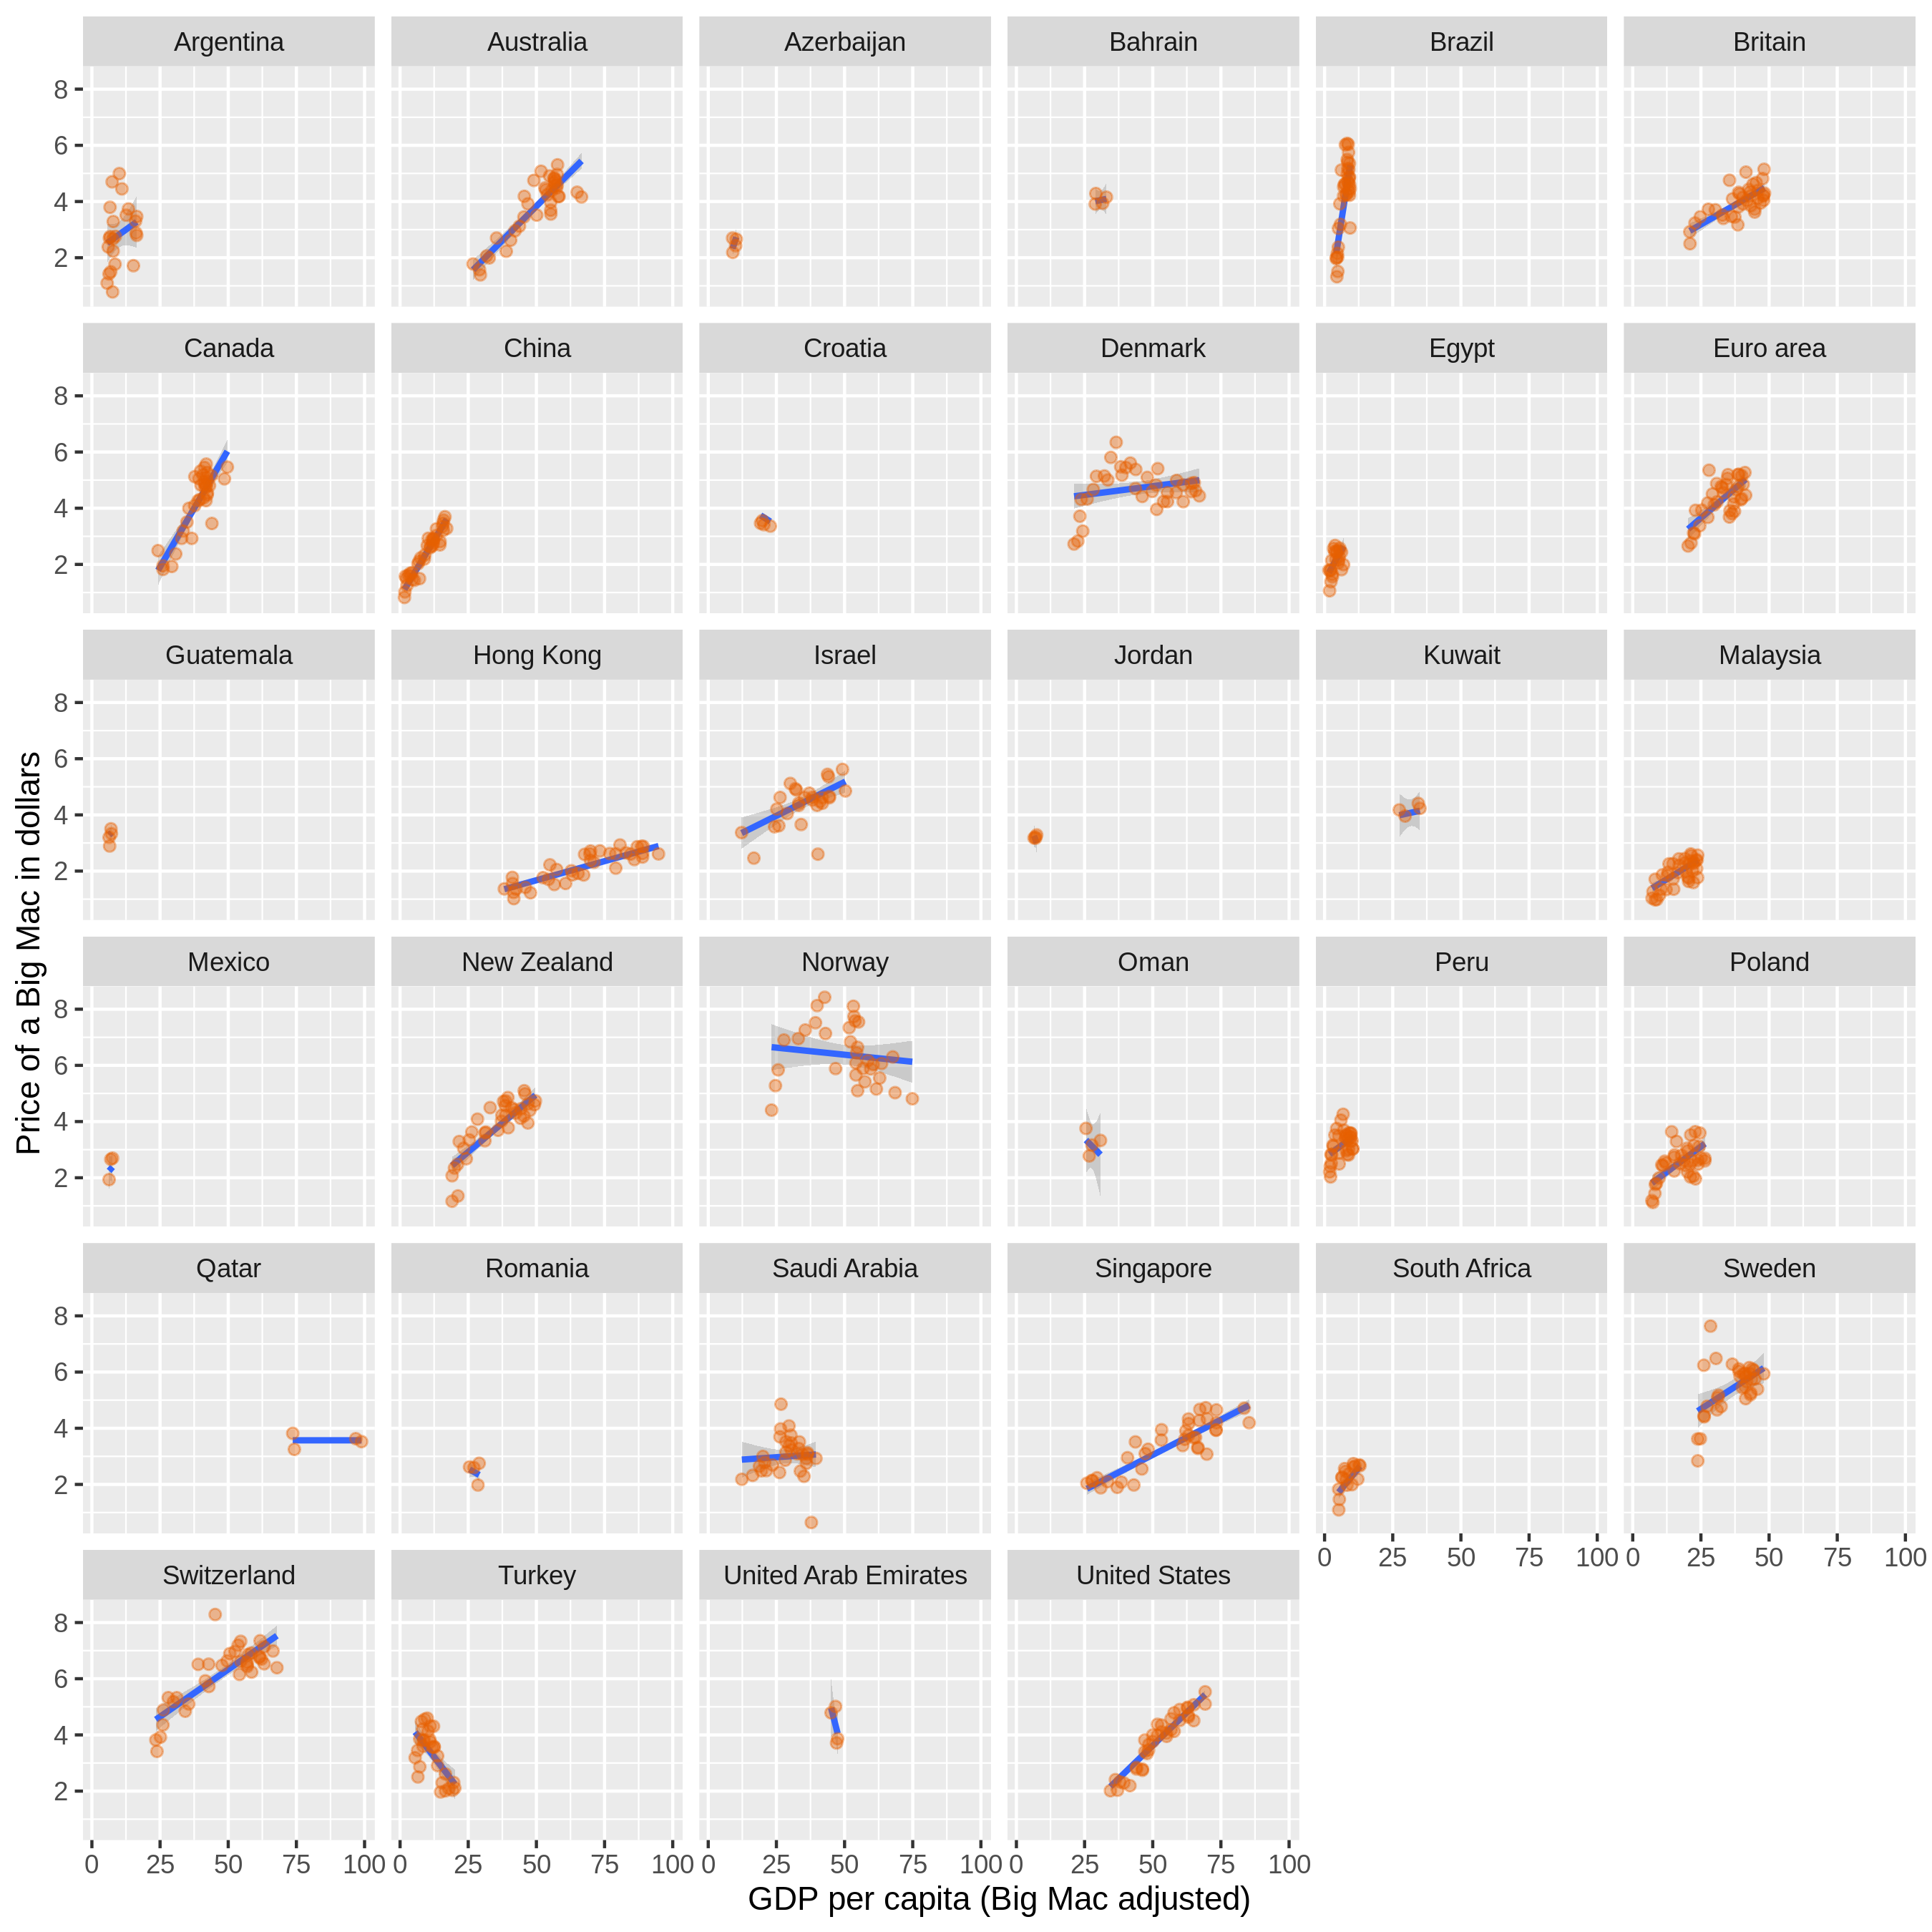

In [12]:
options(repr.plot.width=9, repr.plot.height=9)

p2 = ggplot(bigmac_data, aes(x=GDP_bigmac, y=dollar_price)) +
        facet_wrap(~name)+
        geom_smooth(method = "lm") +
        geom_point(na.rm = TRUE, position = position_jitter(height = 0.4, width=0.2), shape=21, alpha=0.4, color='#e66101', fill='#e66101') +
        scale_x_continuous(labels=function(x) {round(x / 1000)}) +
        labs(y="Price of a Big Mac in dollars", x="GDP per capita (Big Mac adjusted)")

p2

🌟 Therefore, we can see from the plot above that as the GDP er capita increases, the price of a big mac in dollars increases as well in Australla, Britain, Canada, China, Eurp area, etc.